In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('2001_2023_MPCB_Unclean.csv')

# Drop unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=unnamed_columns)

/tmp/ipykernel_19154/1753653983.py:4: DtypeWarning: Columns (31,32,33,34,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2001_2023_MPCB_Unclean.csv')


In [2]:
# Display the first few rows and basic info
df.head()

,Places,Month_name,Date,SO2,Nox,RSPM,SPM,AQI
0,Akola,1,04-12-2009,7,9,117,211,111
1,Akola,2,05-12-2009,8,9,109,188,106
2,Akola,3,11-12-2009,8,9,128,203,119
3,Akola,4,12-12-2009,6,9,118,211,112
4,Akola,5,18-12-2009,8,9,128,212,119


In [3]:
df.tail(10)

,Places,Month_name,Date,SO2,Nox,RSPM,SPM,AQI
59083,Wani,Total,NaN,NaN,NaN,NaN,NaN,NaN
59084,Wani,72,NaN,NaN,NaN,NaN,NaN,NaN
59085,Wani,Min,Max,Avg,NaN,NaN,NaN,NaN
59086,Wani,5,17/01/00,9.89,NaN,NaN,NaN,NaN
59087,Wani,Min,Max,Avg,NaN,NaN,NaN,NaN
59088,Wani,6,14/02/00,22.04,NaN,NaN,NaN,NaN
59089,Wani,Min,Max,Avg,NaN,NaN,NaN,NaN
59090,Wani,77,23/10/00,164.67,NaN,NaN,NaN,NaN
59091,Wani,Min,Max,Avg,NaN,NaN,NaN,NaN
59092,Wani,81,26/01/01,189.93,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59093 entries, 0 to 59092
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Places      59093 non-null  object
 1   Month_name  59093 non-null  object
 2   Date        54970 non-null  object
 3   SO2         54938 non-null  object
 4   Nox         54638 non-null  object
 5   RSPM        54243 non-null  object
 6   SPM         53079 non-null  object
 7   AQI         18620 non-null  object
dtypes: object(8)
memory usage: 3.6+ MB


In [5]:
df.shape

(59093, 8)

In [6]:
df.isnull().sum()

Places            0
Month_name        0
Date           4123
SO2            4155
Nox            4455
RSPM           4850
SPM            6014
AQI           40473
dtype: int64

In [7]:
df.drop(['Month_name'],axis=1,inplace=True)

In [8]:
condition = df.astype(str).apply(lambda row: row.str.contains('Min Max Avg|Max Avg|Min|Max|Avg|Total', na=False)).any(axis=1)
df = df[~condition]

In [9]:
df.shape

(58908, 7)

In [10]:
last_5_columns = df.columns[-5:]

# Drop rows where all values in the last 5 columns are NaN
df = df.dropna(how='all', subset=last_5_columns)

In [11]:
df.isnull().sum()

Places        0
Date          0
SO2          32
Nox         185
RSPM        580
SPM        1744
AQI       36203
dtype: int64

In [12]:
df.shape

(54785, 7)

In [13]:
columns_to_fill = ['SO2', 'Nox', 'RSPM', 'SPM', 'AQI']

# Convert columns to numeric, forcing non-numeric values to NaN
for col in columns_to_fill:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values by group mean
for col in columns_to_fill:
    means = df.groupby('Places')[col].transform('mean')
    df[col].fillna(means, inplace=True)

# Convert float values to integers
for col in columns_to_fill:
    df[col] = df[col].round().astype('Int64')  # Use 'Int64' to retain NaN values if any

In [14]:
df.isnull().sum()

Places        0
Date          0
SO2           0
Nox           0
RSPM          0
SPM           0
AQI       34547
dtype: int64

In [15]:
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

# Calculate mean AQI for each place
mean_aqi_by_place = df.groupby('Places')['AQI'].mean().reset_index()

# Rename columns for clarity
mean_aqi_by_place.columns = ['Place', 'Mean_AQI']

# Print the result
print(mean_aqi_by_place)

          Place    Mean_AQI
0         Akola  100.435918
1     Ambernath   105.87315
2      Amravati   67.112903
3    Aurangabad        <NA>
4      Badlapur  112.493159
5          Beed       58.32
6      Bhiwandi   63.948052
7    Chandrapur        <NA>
8     Dombivali        <NA>
9    Gadchiroli   64.275362
10       Gondia   78.222222
11      Hingoli   48.219512
12      Jalgaon        <NA>
13        Jalna  123.001324
14       Kalyan        <NA>
15     Kolhapur   55.659777
16        Latur   86.362241
17         Lote   98.997543
18       Mumbai        <NA>
19       Nagpur        <NA>
20       Nanded   59.200474
21    Nandurbar        <NA>
22       Nashik        <NA>
23  Navi Mumbai        <NA>
24    Osmanabad        <NA>
25   Pandharpur   72.956044
26       Panvel  103.825806
27     Parbhani   52.147541
28         Pune        <NA>
29    Ratnagiri   70.652174
30       Sangli   67.759527
31       Satara   47.338235
32      Solapur        <NA>
33       Taloja    89.87478
34        Thane   54

In [16]:
df = df.dropna(subset=['AQI'])

In [17]:
df.shape

(20238, 7)

In [18]:
df.isnull().sum()

Places    0
Date      0
SO2       0
Nox       0
RSPM      0
SPM       0
AQI       0
dtype: int64

In [19]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')


In [20]:
df.shape

(20238, 7)

In [21]:
df.dropna(subset=['Date'], inplace=True)


In [22]:
df.shape

(20112, 7)

In [23]:
print(df.isnull().sum())

Places    0
Date      0
SO2       0
Nox       0
RSPM      0
SPM       0
AQI       0
dtype: int64


In [24]:
df.drop_duplicates(inplace=True)


In [25]:
df.shape

(20112, 7)

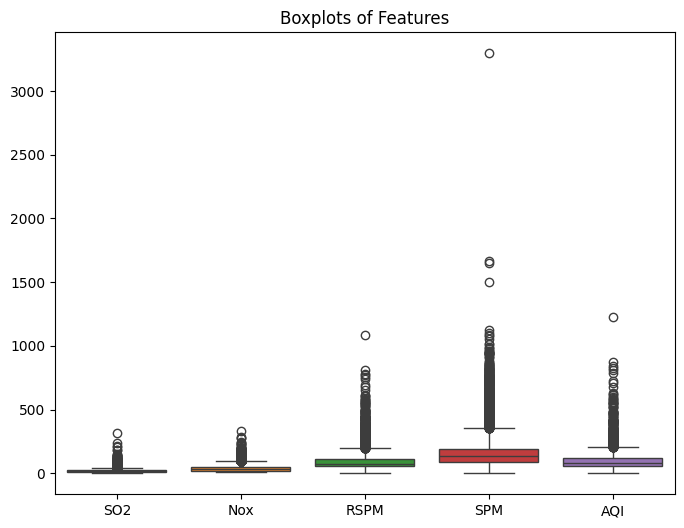

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for detecting outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['SO2', 'Nox', 'RSPM', 'SPM', 'AQI']])
plt.title('Boxplots of Features')
plt.show()

In [27]:
df.shape

(20112, 7)

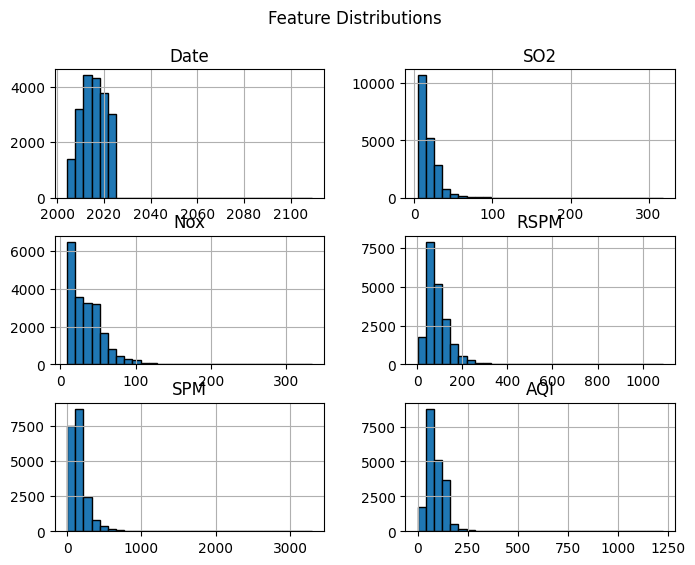

In [28]:

# Histograms of features
df.hist(bins=30, figsize=(8, 6), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


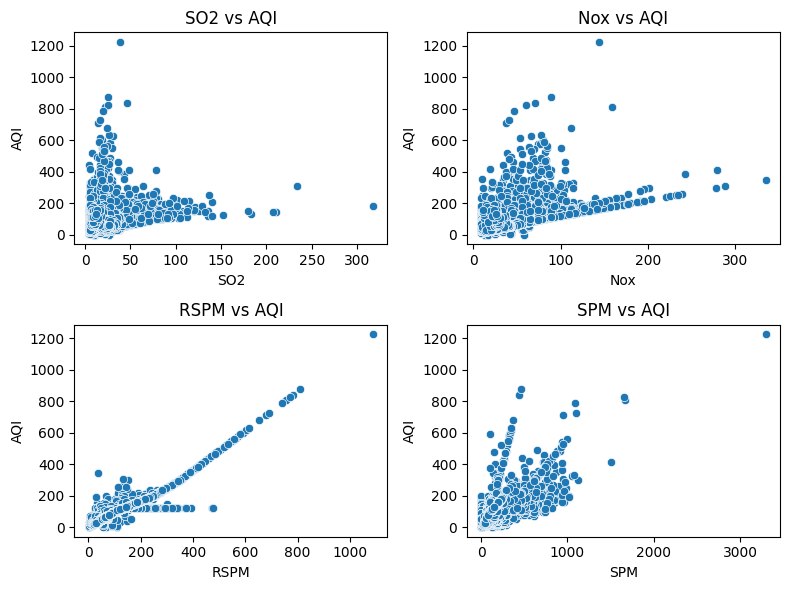

In [29]:
# Scatter plots to understand relationships between features and AQI
plt.figure(figsize=(8, 6))
for i, column in enumerate(['SO2', 'Nox', 'RSPM', 'SPM']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[column], y=df['AQI'])
    plt.title(f'{column} vs AQI')
    plt.xlabel(column)
    plt.ylabel('AQI')
plt.tight_layout()
plt.show()


In [30]:
# Label Encoding for City and AQI_Bucket
from sklearn.preprocessing import LabelEncoder

Places_encoder = LabelEncoder()
df['Places'] = Places_encoder.fit_transform(df['Places'])

In [31]:
df.corr()

,Places,Date,SO2,Nox,RSPM,SPM,AQI
Places,1.000000,-0.047417,-0.031820,0.140679,-0.010931,0.177283,-0.009041
Date,-0.047417,1.000000,-0.078273,0.032319,-0.118057,-0.159911,-0.085015
SO2,-0.031820,-0.078273,1.000000,0.632565,0.189805,0.017208,0.216835
Nox,0.140679,0.032319,0.632565,1.000000,0.373338,0.237185,0.442257
RSPM,-0.010931,-0.118057,0.189805,0.373338,1.000000,0.705579,0.945787
SPM,0.177283,-0.159911,0.017208,0.237185,0.705579,1.000000,0.670748
AQI,-0.009041,-0.085015,0.216835,0.442257,0.945787,0.670748,1.000000


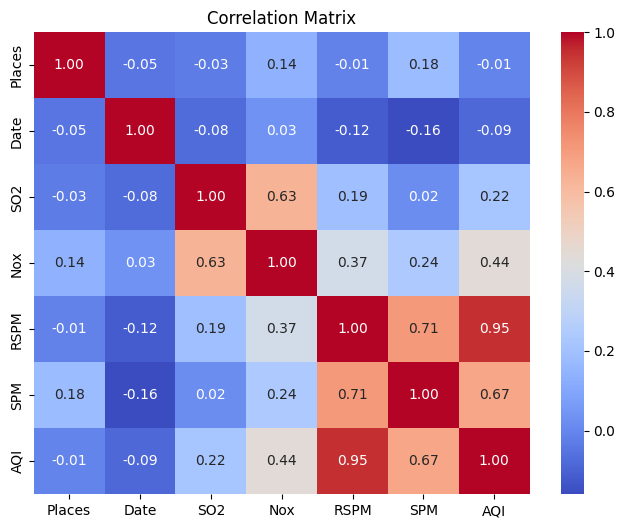

In [32]:
# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [33]:
# Drop 'Date' and 'Places' columns
df = df.drop(columns=['Date', 'Places'])

In [34]:
# Split features and target variable
X = df.drop(columns=['AQI'])
y = df['AQI']


In [35]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Continue with model training, e.g., using a Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the training data
y_train_pred = model.predict(X_train)

# Evaluate on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")

Training Mean Squared Error: 233.77400708558642
Training R^2 Score: 0.8968406669646434


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions
y_test_pred = model.predict(X_test)

# Evaluate on test data
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Test R^2 Score: {r2_test}")

Test Mean Absolute Error (MAE): 9.14740243599304
Test Mean Squared Error (MSE): 1072.532935620184
Test Root Mean Squared Error (RMSE): 32.749548632312234
Test R^2 Score: 0.6312650702468353


In [39]:
if r2_train > r2_test + 0.1:  # adjust threshold as needed
    print("The model might be overfitting.")
else:
    print("The model seems to generalize well.")

The model might be overfitting.


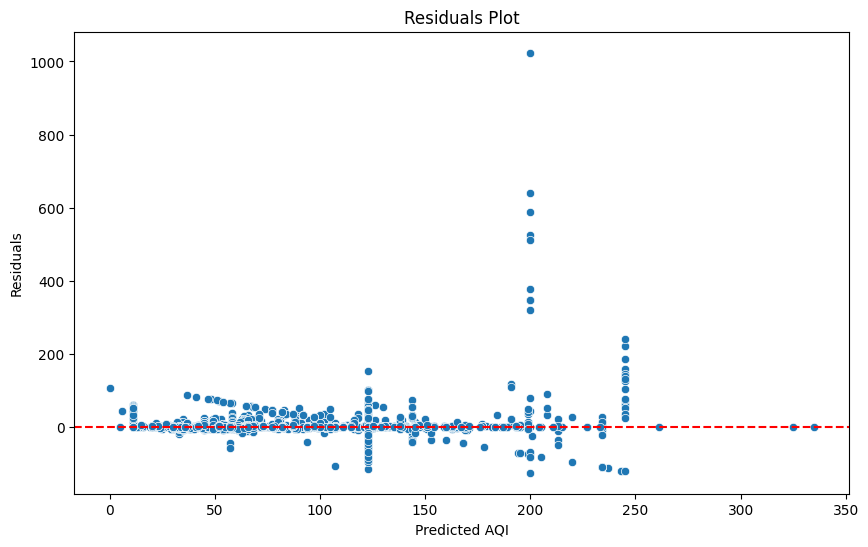

In [40]:
# Residuals plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted AQI')
plt.ylabel('Residuals')
plt.show()

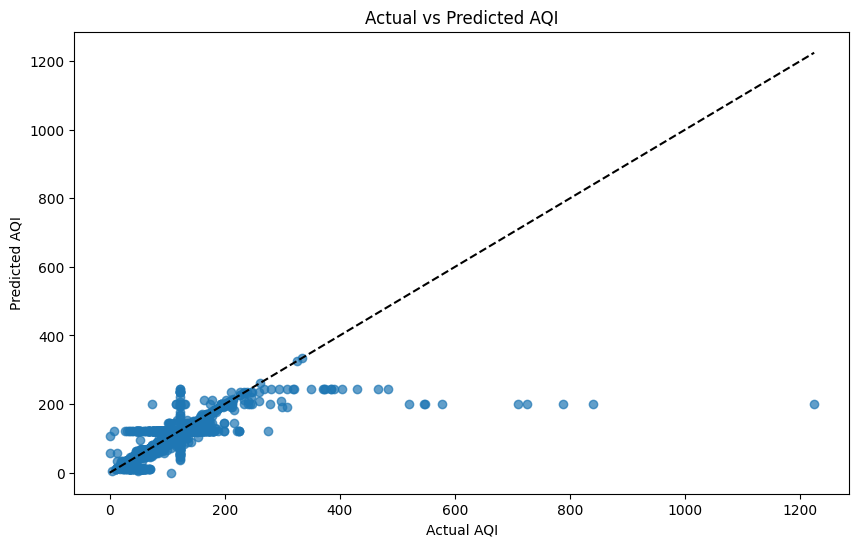

In [41]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.show()


In [42]:
import pickle

# To pickle the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [43]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [44]:
import numpy as np

# Example input (1D array with multiple features)
input_data = np.array([7., 9., 117., 211.])  # Example feature values

# Reshape the input data to a 2D array with shape (1, number_of_features)
input_data_reshaped = input_data.reshape(1, -1)

# Use the reshaped data for prediction
prediction = loaded_model.predict(input_data_reshaped)
print(f"Prediction: {prediction}")


Prediction: [111.]


/home/alkeshlajurkar/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
